**Proyek Akhir : Klasifikasi Gambar**

Nama : Egi Setiawan

email : egi_setiawan@live.com

**Flow**
1. Preparation
2. Data Pre-processing
3. Data Model
4. CNN Scheme
5. Compile model and callback for stop train
6. Train model
7. Predict image

*code is adopted from Dicoding Modul and also from various sources for reference and further learning and understanding*

**Preparation**

In [23]:
# Import libraries yang digunakan
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os
import zipfile

In [ ]:
# import datasets from dicoding web
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-05 10:41:11--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.80MB/s    in 3m 49s  

2021-06-05 10:45:01 (1.34 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [19]:
# extract zip file ke local, assign folder base & train
local_zip = '/tmp/rockpaperscissors.zip'
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'rps-cv-images')
zip_extract = zipfile.ZipFile(local_zip, 'r')
zip_extract.extractall('/tmp')
zip_extract.close()

In [79]:
# check the folder contain
os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors', 'rps-cv-images']

In [84]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

In [83]:
# count the amountt of data
print(len(os.listdir('/tmp/rockpaperscissors/rock')))
print(len(os.listdir('/tmp/rockpaperscissors/paper')))
print(len(os.listdir('/tmp/rockpaperscissors/scissors')))

726
712
750


**Data Pre-Processing**



In [ ]:
# image augmentation with keras
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.4
)
train_datagen

In [102]:
valid_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    validation_split=0.4
)
valid_datagen

**Data Model**

In [106]:
#target directory and generates batches of augmented data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (100, 150),
    batch_size=4,
    class_mode = 'categorical',
    subset = 'training'
)

valid_generator = valid_datagen.flow_from_directory(
    train_dir,
    target_size = (100, 150),
    batch_size=4,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


**CNN Model**

In [104]:
#CNN layer Architecture 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation = 'relu', input_shape = (100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 100, 150, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 50, 75, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 50, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 25, 37, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 25, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 18, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 12, 18, 256)      

**Compile Model & Callback for Stop Train**

In [109]:
# count loss function and optimizer
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']               
)

In [110]:
# callbacks
accuracy_threshold = 0.96
class my_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs ={}):
        if logs.get('accuracy') >= accuracy_threshold:
            print('Accuracy has reach = %2.2f%%' %(logs['accuracy']*100), 'training has been stopped.')
            self.model.stop_training = True
  
callbacks = my_callbacks()  

**Train Model**

In [112]:
# train data
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = valid_generator,
    validation_steps = 5,
    verbose = 1,
    callbacks = [callbacks]
)

Epoch 1/20
25/25 [==============================] - 7s 282ms/step - loss: 0.2979 - accuracy: 0.8800 - val_loss: 0.1731 - val_accuracy: 0.9500
Epoch 2/20
25/25 [==============================] - 7s 278ms/step - loss: 0.2072 - accuracy: 0.9000 - val_loss: 0.3546 - val_accuracy: 0.9000
Epoch 3/20
25/25 [==============================] - 7s 297ms/step - loss: 0.3090 - accuracy: 0.9000 - val_loss: 0.5082 - val_accuracy: 0.7500
Epoch 4/20
25/25 [==============================] - 7s 293ms/step - loss: 0.2739 - accuracy: 0.8600 - val_loss: 0.2895 - val_accuracy: 0.9000
Epoch 5/20
25/25 [==============================] - 7s 286ms/step - loss: 0.1423 - accuracy: 0.9600 - val_loss: 0.1112 - val_accuracy: 0.9500
Epoch 6/20
25/25 [==============================] - 8s 301ms/step - loss: 0.2189 - accuracy: 0.9300 - val_loss: 0.2085 - val_accuracy: 0.8500
Epoch 7/20
25/25 [==============================] - 8s 311ms/step - loss: 0.0977 - accuracy: 0.9700 - val_loss: 0.4541 - val_accuracy: 0.8000
Accura

**Predict Image**

Saving y9PxZE5NfOO323Nv.png to y9PxZE5NfOO323Nv (3).png
y9PxZE5NfOO323Nv.png
scissors


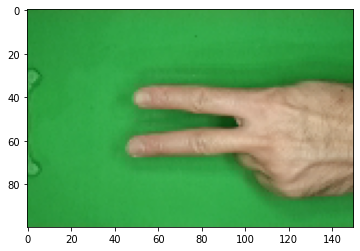

In [113]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  #predict images from upload file
  path = fn
  img_x = image.load_img(path, target_size = (100, 150))
  imgplot = plt.imshow(img_x)
  x = image.img_to_array(img_x)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 4)

  print(fn)
  if classes[0, 0] != 0:
    print('rock')
  elif classes[0, 1] != 0:
    print('paper')
  else:
    print('scissors')